In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() fnc to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-60.02120293857259 -56.78052699609684
50.62852191889405 -17.10999171569577
3.812167739475143 -48.224486763857726
-16.88312843802747 -158.97391643914384
73.51770710299141 36.721553384750536
75.7198114670716 116.08412352569155
56.00149039884565 -138.90612721131032
-8.749417775969306 -33.47976510135837
42.84948782412374 81.04429210861059
-10.989628380686028 170.89470641638235
61.23896182258076 -31.395265972765003
-53.36480251397119 90.65482940869401
-69.1742195468169 9.13006220664738
28.53655839839402 178.07917437744646
74.80560004276828 101.23685360081788
-61.30691618364165 -58.90534763928309
72.67647830153513 178.89015854272867
-57.714707302075645 178.4324863723396
88.14556557138067 103.25245789317972
-22.39112916855592 172.04102089233282
-7.8250940617586195 -4.842319089388184
-89.28664425317956 159.26708847950135
-69.21558992023859 -86.33736617382672
15.73705142776005 -46.054584739729904
38.621573995929026 87.75753857827442
45.038370193910566 -98.81988406484498
56.40286645645568 -82.45

-67.34392841025499 -2.9098567252682415
-1.8955461579423911 96.89057343962264
83.43162535043516 -151.33974153660844
53.93576237746473 106.07736864277109
-60.96693826996676 -32.61601481121383
14.04588780643327 156.55874220187997
74.45160856685666 147.52912704939587
-85.09189040148452 -1.6168313765570588
-76.85734854680788 82.85140212297318
58.77931136939699 59.82140349385318
46.2163358633951 -40.732233836339475
-59.37125716331988 -159.74713044619241
-7.318981404554421 48.93202680623929
65.2001457462805 79.79249040513895
-87.43958089384729 23.259427019961635
-86.62800890935912 -92.05441389980086
51.82632644917862 -122.2742944657342
-49.31946568495937 112.97258337800201
-46.560794651122734 -83.50528937775233
-55.948701758955266 -125.26442565934234
19.02826902322515 31.299248143518582
-50.88923247127736 43.76733751866712
81.9013438624257 105.18847972804497
7.383466126110193 127.91918263707817
-66.70586861700689 -160.4937998140643
-26.310774510571974 -9.84316802385689
16.644458756448614 -20.

-64.42715777930567 122.86599157964923
71.9397544968212 81.74651844046463
57.471505294839005 140.96664055415886
-86.25861782440732 -125.40545701625797
-84.54280548169318 -88.0934474087262
-89.60659241450419 149.0848010128854
33.68921701992973 165.8260808430873
-23.072804893343985 127.1551021628593
-35.096735262580886 117.66263295868441
-65.73793081706995 -70.35150138280653
-40.902567887279474 -49.176667124162975
2.4363622235391205 36.576339730764175
-87.13800690460964 -112.145150838658
45.20100651040636 32.84619011221841
-3.2322146038294335 14.658921903163872
-65.52618363227305 -145.18428657098994
69.30814245457668 116.54564912772605
-36.95284861877706 133.14133762393675
3.784761659018571 165.66101657482022
-65.8106840035849 27.277973901545977
-87.2097832455843 43.681999202663775
-61.890714547959405 118.45907899663047
-67.14895282597799 160.89360614354047
54.96851575768167 -118.41457572051016
27.3833914855104 -44.99909633545573
-83.03155894789262 20.41840244940647
-33.328841193145536 57

In [5]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | amapa
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | olinda
Processing Record 9 of Set 1 | yining
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | leningradskiy
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | sinnamary
Processing Record 23 of Set 

Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | eldikan
City not found. Skipping...
Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | liberal
Processing Record 42 of Set 4 | riyadh
Processing Record 43 of Set 4 | celestun
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | neiafu
Processing Record 46 of Set 4 | myitkyina
Processing Record 47 of Set 4 | bichena
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | virden
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | yatou
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | ugoofaaru
Processing Record 8 of Set 5 | artyk
City not found. Skipping...
Processing Record 9 of Set 5 | kota bahru
Processing Record 10 

Processing Record 27 of Set 8 | santa maria
Processing Record 28 of Set 8 | los llanos de aridane
Processing Record 29 of Set 8 | san jose
Processing Record 30 of Set 8 | kyakhta
Processing Record 31 of Set 8 | sao borja
Processing Record 32 of Set 8 | sarkand
Processing Record 33 of Set 8 | ardesen
Processing Record 34 of Set 8 | zemio
Processing Record 35 of Set 8 | saint-leu
Processing Record 36 of Set 8 | tauranga
Processing Record 37 of Set 8 | chone
Processing Record 38 of Set 8 | chandil
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | hualmay
Processing Record 42 of Set 8 | nanzhang
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | linhares
Processing Record 45 of Set 8 | banon
Processing Record 46 of Set 8 | chumikan
Processing Record 47 of Set 8 | fonte boa
Processing Record 48 of Set 8 | bayan
Processing Record 49 of Set 8 | talcahuano
Processing Record 50 of 

Processing Record 14 of Set 12 | meulaboh
Processing Record 15 of Set 12 | oktyabrskiy
Processing Record 16 of Set 12 | birao
Processing Record 17 of Set 12 | hornepayne
Processing Record 18 of Set 12 | kibaya
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | aleksandrov gay
Processing Record 21 of Set 12 | villazon
Processing Record 22 of Set 12 | maningrida
Processing Record 23 of Set 12 | kieta
Processing Record 24 of Set 12 | samarai
Processing Record 25 of Set 12 | brae
Processing Record 26 of Set 12 | batagay-alyta
Processing Record 27 of Set 12 | benjamin hill
Processing Record 28 of Set 12 | helena
Processing Record 29 of Set 12 | cah ab
City not found. Skipping...
Processing Record 30 of Set 12 | bundaberg
Processing Record 31 of Set 12 | waipawa
Processing Record 32 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 33 of Set 12 | gasa
Processing Record 34 of Set 12 | marsa matruh
Processing Record 35 of Set 12 | aripuana
Proces

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


#Re-order the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-02 06:38:39,-54.8000,-68.3000,37.06,65,0,11.50
1,Dingle,PH,2022-10-02 06:38:39,10.9995,122.6711,86.38,71,99,11.39
2,Amapa,BR,2022-10-02 06:38:40,1.0000,-52.0000,68.45,99,92,1.10
3,Avarua,CK,2022-10-02 06:38:40,-21.2078,-159.7750,71.65,64,40,9.22
4,Saskylakh,RU,2022-10-02 06:38:41,71.9167,114.0833,29.16,95,100,14.50
5,Sitka,US,2022-10-02 06:38:41,57.0531,-135.3300,48.09,87,20,6.91
6,Olinda,BR,2022-10-02 06:35:38,-8.0089,-34.8553,76.73,73,40,6.91
7,Yining,CN,2022-10-02 06:38:41,29.0361,114.5636,101.01,30,4,7.54
8,Sola,VU,2022-10-02 06:38:42,-13.8833,167.5500,81.27,89,75,0.00
9,Tasiilaq,GL,2022-10-02 06:38:42,65.6145,-37.6368,35.69,99,100,10.47


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# PLOTTING DATA
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

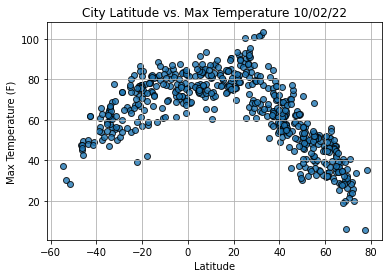

In [18]:
#Import time module
import time

# Build scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
         
# Save the figure
plt.savefig("weather_data/Fig1.png")
     
         
# Show the plot
plt.show()         
         

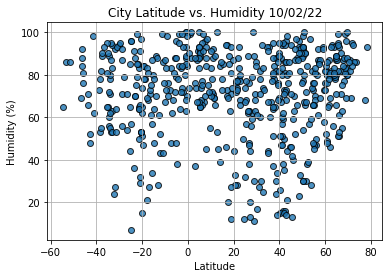

In [19]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
         
# Save the figure
plt.savefig("weather_data/Fig2.png")
     
         
# Show the plot
plt.show()         
         

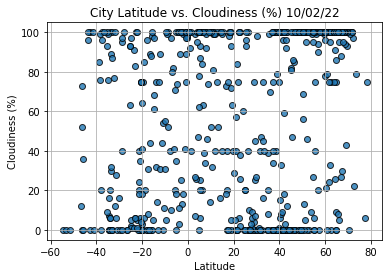

In [20]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
         
# Save the figure
plt.savefig("weather_data/Fig3.png")
     
         
# Show the plot
plt.show()         
         

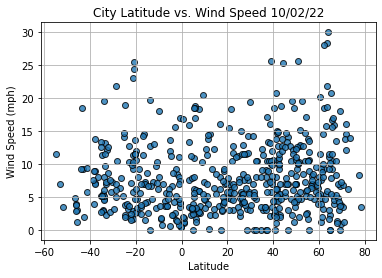

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()